## Introduction
Nowdays offline methods for accessing financial products are moving online.And thanks to the internet, there are countless ways criminals can obtain your data, access funds, or steal assets unexpectedly. Logging into an insecure Wi-Fi is enough to expose your personal information to nearby scam artists preying on the unsuspecting. But it can also happen in the privacy of your home or at your place of business.

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. In this project we are going to build a model using MLPClassifier which predicts if the transaction is genuine or fraudelent.



In [12]:
#libraries used
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [479]:
#load_data 
df = pd.read_csv("creditcard.csv")
#show first 5 raws in data
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [481]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## observation
#### 1. features from V1:V28 data are encoded and scaled(-1:1).
#### 2. Time and Amount ranges vary from other features so we need to scale them.
#### 3. mean of Class feature is much less than 0.5 which means that the data is not balanced.

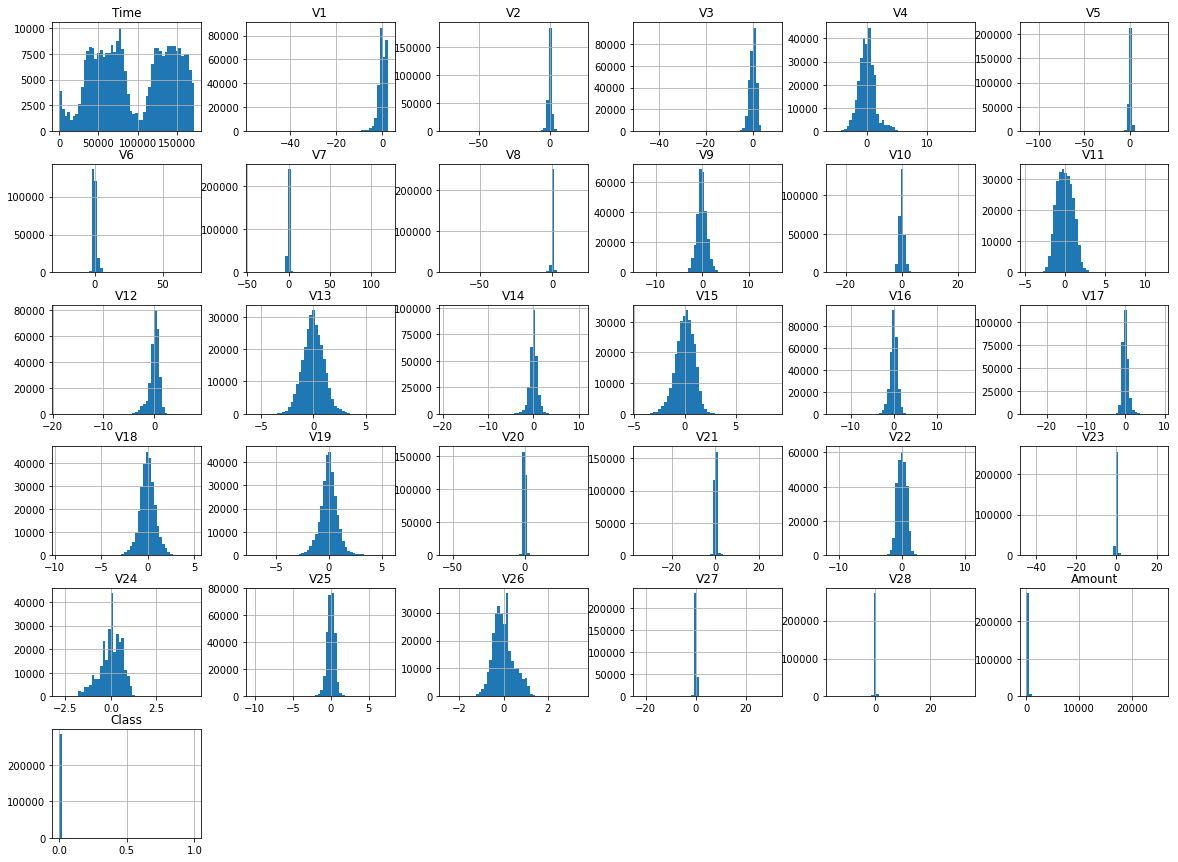

In [482]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

In [485]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

1 --- fraud

0 --- non fraud

in this data, the fruad data don't exceed one percent of all data (i.e the data is not balanced ).

in this case, accuracy matrix is not effective. Because by doing nothing but just predicting everything is in the maority class, you can obtain a higher accuracy than by building a predictive model.

in this project, we will use percision matrix for fraud class for evaluating.

# ---------------------------------------------------------------------------------------------------------------
there is another way to deal with unbalanced data is to convert it to balaned data by choosing the same amout of two classes and create your new dataset.

but in this case fraud data is very small so the new data will be very small (<1000 raws). neural networks need very large data to perform well. so we don't use this way.

In [22]:
#non_fruad=df[df['Class']==0]
#non_fruad.shape

(284315, 31)

In [23]:
#fruad=df[df['Class']==1]
#fruad.shape

(492, 31)

In [25]:
#non_fruad = non_fruad.sample(n=492)
#non_fruad.shape

(492, 31)

In [57]:
#balanced_df=pd.concat([non_fruad,fruad],ignore_index=True)
#balanced_df=balanced_df.sample(frac=1,random_state=1).reset_index()
#balanced_df.shape

(984, 32)

In [58]:
#balanced_df.head(10)

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,953,155542.0,1.868226,1.363077,-1.994934,4.173516,1.239751,-0.746186,0.572731,-0.131235,...,-0.301001,-0.818972,0.206812,-0.263683,-0.114958,-0.240672,-0.006629,0.017258,3.14,1
1,236,121193.0,2.117014,-0.876500,-1.350676,-1.030894,-0.458667,-0.754510,-0.402439,-0.166631,...,-0.012090,-0.199514,0.217445,-0.498147,-0.236393,-0.418224,-0.045744,-0.066055,49.40,0
2,484,31089.0,1.128453,-0.458756,0.982956,0.058213,-1.116810,-0.319400,-0.597986,0.074580,...,0.085645,0.441101,-0.011290,0.528382,0.145247,1.538955,-0.061094,0.007645,34.90,0
3,799,93879.0,-13.086519,7.352148,-18.256576,10.648505,-11.731476,-3.659167,-14.873658,8.810473,...,2.761157,-0.266162,-0.412861,0.519952,-0.743909,-0.167808,-2.498300,-0.711066,30.31,1
4,723,68357.0,1.232604,-0.548931,1.087873,0.894082,-1.433055,-0.356797,-0.717492,0.003167,...,-0.448671,-0.517568,0.012833,0.699217,0.527258,-0.322607,0.080805,0.035427,19.59,1
5,605,41147.0,-5.314173,4.145944,-8.532522,8.344392,-5.718008,-3.043536,-10.989185,3.404129,...,2.331466,0.862996,-0.614453,0.523648,-0.712593,0.324638,2.245091,0.497321,88.23,1
6,355,56374.0,-0.849893,1.063647,0.360593,-0.756221,0.604137,0.108321,0.217046,0.555996,...,-0.241320,-0.822227,-0.111807,-1.359581,-0.065313,0.039176,-0.008493,-0.045730,2.69,0
7,952,155535.0,0.711155,2.617105,-4.722363,5.842970,-0.600179,-1.646313,-2.785198,0.540368,...,0.360501,-0.865526,0.139978,-0.336238,0.128449,-0.155646,0.799460,0.392170,3.90,1
8,560,26961.0,-23.237920,13.487386,-25.188773,6.261733,-17.345188,-4.534989,-17.100492,15.374630,...,1.769708,-1.691973,-1.045673,0.143386,1.611577,-0.221576,1.481233,0.438125,99.99,1
9,529,14152.0,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,...,1.990545,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.721644,1.00,1


In [59]:
#balanced_df.describe()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,491.500000,87296.351626,-2.394767,1.852308,-3.474191,2.235321,-1.554683,-0.674279,-2.770278,0.307498,...,0.362139,0.007041,-0.021722,-0.061426,0.004501,0.017752,0.088238,0.053824,101.875396,0.500000
std,284.200633,47807.583716,5.496206,3.645485,6.235538,3.216487,4.205339,1.780481,5.848957,4.852546,...,2.800100,1.165255,1.140596,0.580359,0.676171,0.482091,0.997686,0.448445,224.764527,0.500254
min,0.000000,406.000000,-30.552380,-8.402154,-31.103685,-4.150090,-22.105532,-6.406267,-43.557242,-41.044261,...,-22.797604,-8.887017,-19.254328,-2.659700,-4.781606,-1.289770,-7.263482,-1.869290,0.000000,0.000000
25%,245.750000,46479.000000,-2.788129,-0.096509,-5.120349,-0.084950,-1.775001,-1.529988,-3.078361,-0.197970,...,-0.165985,-0.531498,-0.234946,-0.415078,-0.349452,-0.302849,-0.060424,-0.053349,1.500000,0.000000
50%,491.500000,79447.500000,-0.778241,1.030692,-1.252061,1.334037,-0.445288,-0.648693,-0.598559,0.160622,...,0.148545,0.033940,-0.032123,-0.001410,0.027260,-0.016265,0.058051,0.039858,16.645000,0.500000
75%,737.250000,132274.500000,0.949687,2.819453,0.377404,4.190838,0.512625,0.029203,0.297154,0.876545,...,0.645756,0.586894,0.202141,0.360319,0.380367,0.322036,0.423189,0.223473,99.990000,1.000000
max,983.000000,171369.000000,2.258313,22.057729,3.171496,12.114672,11.095089,6.474115,5.802537,20.007208,...,27.202839,8.361985,5.466230,3.658746,2.208209,2.745261,3.052358,4.909792,2125.870000,1.000000


# ---------------------------------------------------------------------------------------------------------------

In [486]:
# Scale "Time" and "Amount"
from sklearn.preprocessing import StandardScaler
df[['Scaled_Time','Scaled_Amount']]=StandardScaler().fit_transform(df[['Time','Amount']])
df=df.drop(['Time','Amount'],axis=1)
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Time,Scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403


In [487]:
#prepare data for neural network
X = df.drop(['Class'],axis=1, inplace=False) #  
X = np.array(X).astype(float)
y = df[['Class']]  
y = np.array(y).astype(float)

In [522]:
#split data (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape

((227845, 30), (56962, 30), (227845, 1))

## 1. The first part of the project is to use MLPClassifier to detect fruad data

In [674]:
#create the model
clf=MLPClassifier(activation='logistic', alpha=0.0002, hidden_layer_sizes=(28, 30),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0, solver='lbfgs')

In [675]:
#fit data
clf.fit(X_train,np.ravel(y_train,order='C'))

MLPClassifier(activation='logistic', alpha=0.0002, hidden_layer_sizes=(28, 30),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0, solver='lbfgs')

In [676]:
y_predicted = clf.predict(X_test)

### evaluate the first model 

In [677]:
import sklearn
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print('Classification report:\n', classification_report(y_test, y_predicted))
cm=confusion_matrix(y_true = y_test, y_pred = y_predicted)
print('Confusion matrix:\n',np.flip(cm))


Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.80      0.80      0.80        98

    accuracy                           1.00     56962
   macro avg       0.90      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
 [[   78    20]
 [   19 56845]]


In [678]:
print('accuracy_score : ',sklearn.metrics.accuracy_score(y_test, y_predicted, normalize=True, sample_weight=None))
precision = sklearn.metrics.precision_score(y_test, y_predicted, pos_label=1.0)
print('precision : ',precision)
recall = sklearn.metrics.recall_score(y_test, y_predicted, pos_label=1.0)
print('recall rate : ',recall)

accuracy_score :  0.9993153330290369
precision :  0.8041237113402062
recall rate :  0.7959183673469388


#### observation:
1. as we say befor acuuracy is very high but this is not mean is highly efficient.
2. the percision for fraud class which we evaluate with is not high (just 80%).

## II. the next part is to use genatic algorithm to choose best parameter for the model

Now we can start structuring the genetic algorithm as flow:
1. construct the population contains number of solutions (chromosomes). Each solution contaions some values(genes) in this project genes is the parameters of neural network we need to optimize.
2. calculate fitness function for each solution. in this case we will use percision for fraud class as fitness function.
3. based on fitness function, we choose the best parents to create next generation.
4. use crossover function to generate new childs from choosen parents.
5. use mutation function on new childs
6. here we can construct new popularttion from childs and parents. 
7. apply these steps form number of generation until reach good model.


Individuals in the population are composed of three parameters which highly affect the model (activation, solver, and numbersof neurons in the hidden layers)

In [723]:
#first we initialize the population with number of solutions(pop_size)
def initialization_pop(pop_size):
    size=[[]]*pop_size
    activation=['identity','logistic','tanh','relu']
    solver=['lbfgs','sgd','adam']
    pop=[[random.choice(activation),random.choice(solver),randint(2,100),randint(2,100)]for i in range (0,pop_size)]
    return pop

In [724]:
# just to see the output of (initialization_pop_mlp) function
pop=initialization_pop(6)
print(pop)

[['identity', 'sgd', 34, 68], ['logistic', 'sgd', 10, 56], ['identity', 'sgd', 41, 64], ['tanh', 'sgd', 5, 99], ['tanh', 'adam', 50, 67], ['identity', 'adam', 7, 52]]


In [738]:
def function_fitness_mlp(pop, x_train,y_train,x_test,y_test):
    fitness=[]
    for w in pop:
        clf=MLPClassifier(activation=w[0],solver=w[1],hidden_layer_sizes=((int(w[2])),(int(w[3]))),learning_rate_init=0.09,alpha=0.0002,max_iter=3000,n_iter_no_change=50,random_state=0)
        clf.fit(x_train,y_train)
        y_predicted = clf.predict(X_test)
        f= sklearn.metrics.precision_score(y_test, y_predicted, pos_label=1.0)
        fitness.append([f,clf,w])
    return fitness

In [739]:
# just to see the output of (function_fitness_mlp) function
function_fitness_list=function_fitness_mlp(pop, X_train,np.ravel(y_train,order='C'),X_test,y_test)
print(function_fitness_list)

C:\Users\Ola Emad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.8205128205128205, MLPClassifier(activation='identity', alpha=0.0002, hidden_layer_sizes=(34, 68),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0, solver='sgd'), ['identity', 'sgd', 34, 68]], [0.8620689655172413, MLPClassifier(activation='logistic', alpha=0.0002, hidden_layer_sizes=(10, 56),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0, solver='sgd'), ['logistic', 'sgd', 10, 56]], [0.8524590163934426, MLPClassifier(activation='identity', alpha=0.0002, hidden_layer_sizes=(41, 64),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0, solver='sgd'), ['identity', 'sgd', 41, 64]], [0.8620689655172413, MLPClassifier(activation='tanh', alpha=0.0002, hidden_layer_sizes=(5, 99),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0, solver='sgd'), ['tanh', 'sgd', 5, 99]], [0.0,

In [740]:
# sort solution by thier fitness function
pop_fitness_sort = np.array(list (reversed (sorted(function_fitness_list, key= lambda x: x[0]))))
print(pop_fitness_sort)
Length = len(pop_fitness_sort)
#select parents 
parent_1 = pop_fitness_sort[:,2][: Length//2]
parent_2 = pop_fitness_sort[:,2][Length//2:]
# just to see the output of (select parents ) function
print('parent_1 : ',parent_1)
print('parent_2 : ',parent_2)


[[0.8620689655172413
  MLPClassifier(activation='tanh', alpha=0.0002, hidden_layer_sizes=(5, 99),
                learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
                random_state=0, solver='sgd')
  list(['tanh', 'sgd', 5, 99])]
 [0.8620689655172413
  MLPClassifier(activation='logistic', alpha=0.0002, hidden_layer_sizes=(10, 56),
                learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
                random_state=0, solver='sgd')
  list(['logistic', 'sgd', 10, 56])]
 [0.8524590163934426
  MLPClassifier(activation='identity', alpha=0.0002, hidden_layer_sizes=(41, 64),
                learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
                random_state=0, solver='sgd')
  list(['identity', 'sgd', 41, 64])]
 [0.8305084745762712
  MLPClassifier(activation='identity', alpha=0.0002, hidden_layer_sizes=(7, 52),
                learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
                random_state=0)
  list(['i

C:\Users\OLAEMA~1\AppData\Local\Temp/ipykernel_19376/949163634.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pop_fitness_sort = np.array(list (reversed (sorted(function_fitness_list, key= lambda x: x[0]))))


In [741]:
# apply crossover on parents to generate childs
def crossover_mlp(parent_1,parent_2):
    child=[parent_1[0],parent_2[1],parent_1[2],parent_2[3]]
    return child
child1=[crossover_mlp (parent_1[i], parent_2[i]) for i in range(0, np.min([len (parent_2), len(parent_1)]))] 
child2= [crossover_mlp (parent_2[i], parent_1[i]) for i in range(0, np.min([len (parent_2), len(parent_1)]))] 
# just to see the output of (crossover_mlp ) function
print('child1 : ',child1)
print("-----------------")
print('child2 : ',child2)

child1 :  [['tanh', 'adam', 5, 52], ['logistic', 'sgd', 10, 68], ['identity', 'adam', 41, 67]]
-----------------
child2 :  [['identity', 'sgd', 7, 99], ['identity', 'sgd', 34, 56], ['tanh', 'sgd', 50, 64]]


In [742]:
# mutation function
def mutation_mlp(child,prob_mut):
    for c in range(0,len(child)):
        if np.random.rand() > prob_mut:
            k=randint(2,3)
            child[c][k]=int(child[c][k])+randint(1,10)
    return child

# just to see the output of (mutation ) function
#apply mutation function on child2
child_2 =mutation_mlp (child2, prob_mut=.7)
print(child_2)

[['identity', 'sgd', 7, 102], ['identity', 'sgd', 34, 56], ['tanh', 'sgd', 59, 64]]


In [744]:
## here we have parents and child as new population
## we have fitnees function for parents . now we will calculate fitness function for childs 
#fitness_child_1= function_fitness_mlp (child1,X_train,np.ravel(y_train,order='C'), X_test, y_test) 
print(fitness_child_1)
fitness_child_2 =function_fitness_mlp(child_2, X_train, np.ravel(y_train,order='C'), X_test, y_test)
pop_fitness_sort= np.concatenate((pop_fitness_sort, fitness_child_1, fitness_child_2)) 
sort = np.array(list(reversed (sorted (pop_fitness_sort, key=lambda x: x[0])))) 

[[0.0, MLPClassifier(activation='tanh', alpha=0.0002, hidden_layer_sizes=(5, 52),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0), ['tanh', 'adam', 5, 52]], [0.8461538461538461, MLPClassifier(activation='logistic', alpha=0.0002, hidden_layer_sizes=(10, 68),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0, solver='sgd'), ['logistic', 'sgd', 10, 68]], [0.6842105263157895, MLPClassifier(activation='identity', alpha=0.0002, hidden_layer_sizes=(41, 67),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0), ['identity', 'adam', 41, 67]]]


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [745]:
# this ssolution is for 1 generation 
pop_fitness_sort =sort[0:10, :] 
best_individual =sort[0][1] 
print(sort)
print('best_individual : ',best_individual)

[[0.8636363636363636
  MLPClassifier(activation='identity', alpha=0.0002, hidden_layer_sizes=(7, 102),
                learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
                random_state=0, solver='sgd')
  list(['identity', 'sgd', 7, 102])]
 [0.8636363636363636
  MLPClassifier(activation='identity', alpha=0.0002, hidden_layer_sizes=(7, 102),
                learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
                random_state=0, solver='sgd')
  list(['identity', 'sgd', 7, 102])]
 [0.8620689655172413
  MLPClassifier(activation='logistic', alpha=0.0002, hidden_layer_sizes=(10, 56),
                learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
                random_state=0, solver='sgd')
  list(['logistic', 'sgd', 10, 56])]
 [0.8620689655172413
  MLPClassifier(activation='tanh', alpha=0.0002, hidden_layer_sizes=(5, 99),
                learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
                random_state=0, solv

In [746]:
clf= MLPClassifier(activation='identity', alpha=0.0002, hidden_layer_sizes=(7, 102),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0, solver='sgd')

In [747]:
clf.fit(X_train,np.ravel(y_train,order='C'))

MLPClassifier(activation='identity', alpha=0.0002, hidden_layer_sizes=(7, 102),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0, solver='sgd')

In [748]:
y_predicted = clf.predict(X_test)

In [749]:
print('Classification report:\n', classification_report(y_test, y_predicted))
cm=confusion_matrix(y_true = y_test, y_pred = y_predicted)
print('Confusion matrix:\n',np.flip(cm))
print('accuracy_score : ',sklearn.metrics.accuracy_score(y_test, y_predicted, normalize=True, sample_weight=None))
precision = sklearn.metrics.precision_score(y_test, y_predicted, pos_label=1.0)
print('precision : ',precision)

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
 [[   57    41]
 [    9 56855]]
accuracy_score :  0.9991222218320986
precision :  0.8636363636363636


## apply the whole getentic algorithm 


In [701]:
# number of solution ---- 6
# number of genes ------ 4
# number of generation ---- 3
import random
from random import randint
def ag_mlp(X_train, y_train, X_test, y_test,num_generations = 3, pop_size=6, prob_mut=0.8):
    pop= initialization_pop_mlp (pop_size) 
    fitness =function_fitness_mlp (pop, X_train, y_train, X_test, y_test) 
    pop_fitness_sort = np.array(list (reversed (sorted(fitness, key= lambda x: x[0]))))
    print(pop_fitness_sort)
    for i in range(0, num_generations):
        Length = len(pop_fitness_sort)
        #seleciona os pais
        parent_1 = pop_fitness_sort[:,2][: Length//2]
        parent_2 = pop_fitness_sort[:,2][Length//2:]
    #cruzamento 
        child_1 = [crossover_mlp (parent_1[i], parent_2[i]) for i in range(0, np.min([len (parent_2), len(parent_1)]))] 
        child_2= [crossover_mlp (parent_2[i], parent_1[i]) for i in range(0, np.min([len (parent_2), len(parent_1)]))] 
        child_2 =mutation_mlp (child_2, prob_mut)
        #calcula o fitness dos filhos para escolher quem vai passar pra próxima geração 
        fitness_child_1= function_fitness_mlp (child_1,X_train, y_train, X_test, y_test) 
        fitness_child_2 =function_fitness_mlp(child_2, X_train, y_train, X_test, y_test)
        pop_fitness_sort= np.concatenate((pop_fitness_sort, fitness_child_1, fitness_child_2)) 
        sort = np.array(list(reversed (sorted (pop_fitness_sort, key=lambda x: x[0])))) 
        #seleciona individuos da proxima geração
        pop_fitness_sort =sort[0:size_mlp, :] 
        best_individual =sort[0][1] 
        #print('num_generations:',1)
    return best_individual

In [702]:
ag_mlp(X_train,np.ravel(y_train), X_test, y_test, num_epochs = 3, size_mlp=6, prob_mut=0.8)

[[0.7, MLPClassifier(activation='identity', alpha=0.0002, hidden_layer_sizes=(75, 80),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0), ['identity', 'adam', 75, 80]]]
-----------------------------------------------------------------------------------------------------------
[[0.7, MLPClassifier(activation='identity', alpha=0.0002, hidden_layer_sizes=(75, 80),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0), ['identity', 'adam', 75, 80]], [0.8269230769230769, MLPClassifier(activation='identity', alpha=0.0002, hidden_layer_sizes=(8, 73),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0, solver='sgd'), ['identity', 'sgd', 8, 73]]]
-----------------------------------------------------------------------------------------------------------
[[0.7, MLPClassifier(activation='identity', alpha=0.0002, hidden_layer_sizes=(75, 80),


C:\Users\Ola Emad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.7, MLPClassifier(activation='identity', alpha=0.0002, hidden_layer_sizes=(75, 80),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0), ['identity', 'adam', 75, 80]], [0.8269230769230769, MLPClassifier(activation='identity', alpha=0.0002, hidden_layer_sizes=(8, 73),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0, solver='sgd'), ['identity', 'sgd', 8, 73]], [0.8333333333333334, MLPClassifier(activation='identity', alpha=0.0002, hidden_layer_sizes=(49, 98),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0, solver='sgd'), ['identity', 'sgd', 49, 98]], [0.0, MLPClassifier(alpha=0.0002, hidden_layer_sizes=(83, 28),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0), ['relu', 'adam', 83, 28]]]
--------------------------------------------------------------------------------

C:\Users\OLAEMA~1\AppData\Local\Temp/ipykernel_19376/3918598176.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pop_fitness_sort = np.array(list (reversed (sorted(fitness, key= lambda x: x[0]))))
C:\Users\Ola Emad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.0, MLPClassifier(alpha=0.0002, hidden_layer_sizes=(35, 20),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0), ['relu', 'adam', 35, 20]]]
-----------------------------------------------------------------------------------------------------------
[[0.0, MLPClassifier(alpha=0.0002, hidden_layer_sizes=(35, 20),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0), ['relu', 'adam', 35, 20]], [0.25380710659898476, MLPClassifier(activation='identity', alpha=0.0002, hidden_layer_sizes=(49, 80),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0), ['identity', 'adam', 49, 80]]]
-----------------------------------------------------------------------------------------------------------
[[0.0, MLPClassifier(alpha=0.0002, hidden_layer_sizes=(35, 20),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
            

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[[0.8953488372093024, MLPClassifier(alpha=0.0002, hidden_layer_sizes=(35, 47),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0, solver='sgd'), ['relu', 'sgd', 35, 47]]]
-----------------------------------------------------------------------------------------------------------
[[0.8953488372093024, MLPClassifier(alpha=0.0002, hidden_layer_sizes=(35, 47),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0, solver='sgd'), ['relu', 'sgd', 35, 47]], [0.8783783783783784, MLPClassifier(activation='identity', alpha=0.0002, hidden_layer_sizes=(75, 98),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0, solver='sgd'), ['identity', 'sgd', 75, 98]]]
-----------------------------------------------------------------------------------------------------------
[[0.8953488372093024, MLPClassifier(alpha=0.0002, hidden_layer_sizes=(35, 47),
    

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[[0.9, MLPClassifier(alpha=0.0002, hidden_layer_sizes=(35, 98),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0, solver='sgd'), ['relu', 'sgd', 35, 98]]]
-----------------------------------------------------------------------------------------------------------
[[0.9, MLPClassifier(alpha=0.0002, hidden_layer_sizes=(35, 98),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0, solver='sgd'), ['relu', 'sgd', 35, 98]], [0.9295774647887324, MLPClassifier(alpha=0.0002, hidden_layer_sizes=(35, 73),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0, solver='sgd'), ['relu', 'sgd', 35, 73]]]
-----------------------------------------------------------------------------------------------------------
[[0.9, MLPClassifier(alpha=0.0002, hidden_layer_sizes=(35, 98),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
 

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


MLPClassifier(alpha=0.0002, hidden_layer_sizes=(35, 73),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0, solver='sgd')

## optimized MLPClassifier

In [704]:
clf= MLPClassifier(alpha=0.0002, hidden_layer_sizes=(35, 73),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0, solver='sgd')

In [705]:
clf.fit(X_train,np.ravel(y_train,order='C'))

MLPClassifier(alpha=0.0002, hidden_layer_sizes=(35, 73),
              learning_rate_init=0.09, max_iter=3000, n_iter_no_change=50,
              random_state=0, solver='sgd')

In [706]:
y_predicted = clf.predict(X_test)

In [707]:
print('Classification report:\n', classification_report(y_test, y_predicted))
cm=confusion_matrix(y_true = y_test, y_pred = y_predicted)
print('Confusion matrix:\n',np.flip(cm))
print('accuracy_score : ',sklearn.metrics.accuracy_score(y_test, y_predicted, normalize=True, sample_weight=None))
precision = sklearn.metrics.precision_score(y_test, y_predicted, pos_label=1.0)
print('precision : ',precision)

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.93      0.67      0.78        98

    accuracy                           1.00     56962
   macro avg       0.96      0.84      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
 [[   66    32]
 [    5 56859]]
accuracy_score :  0.9993504441557529
precision :  0.9295774647887324
